<a href="https://colab.research.google.com/github/jojker/PML_Workshops/blob/master/Summer%202019/Day%203%20-%20Goal%202%20-%20Turning%20Data%20into%20Images/Ex%205%20-%20Adversarial%20Autoencoders%20Xia%20Ji/aae_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Link to Slides about generative networks
https://github.com/jojker/PML_Workshops/blob/master/Summer%202019/Day%203%20-%20Goal%202%20-%20Turning%20Data%20into%20Images/Ex%205%20-%20Adversarial%20Autoencoders%20Xia%20Ji/Generative%20models.pdf

## Download code for Adversarial Autoencoder (AAE) from the github repository.


In [0]:
!git clone https://github.com/tinaxia2016/adversarial-autoencoders
!pip install --user --upgrade tensorflow-probability

Cloning into 'adversarial-autoencoders'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 13.73 MiB | 42.10 MiB/s, done.
Resolving deltas: 100% (209/209), done.
Requirement already up-to-date: tensorflow-probability in /usr/local/lib/python3.6/dist-packages (0.7.0)


## Adversarial autoencoder 

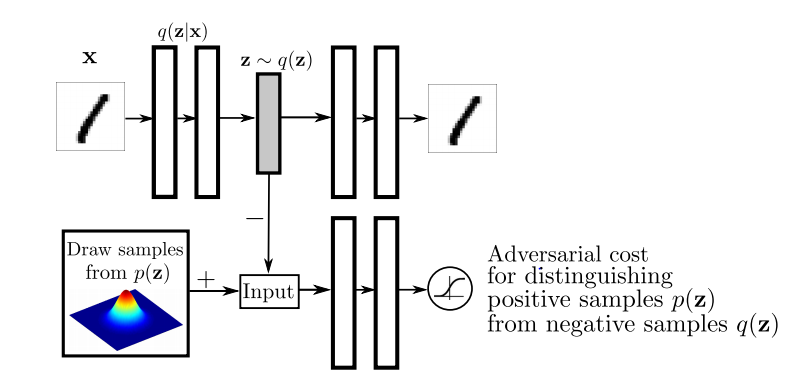

In [4]:
cd adversarial-autoencoders/figs/
from IPython.display import Image
Image('s_1.png')

## In this experiment, we are going to train AAE to map hand-written digit image to 2d Gaussian distributed datapoint. 




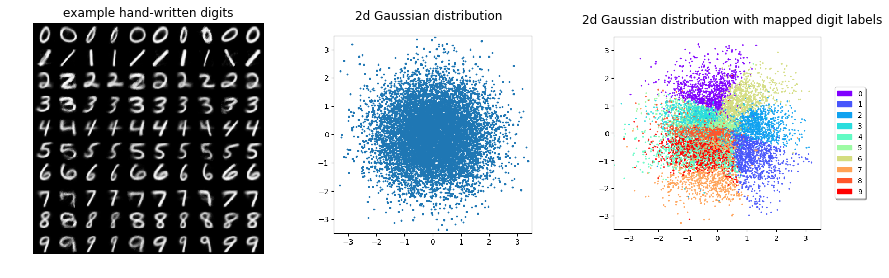

In [32]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

x0 = imread('supervise_code2.png')
x = imread('gaussian_diagonal.png')
y = imread('gaussian_latent.png')

f,a = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [2.5,2.5, 3]})
a[0].imshow(x0,cmap='gray')
a[0].axis('off')
a[0].set(title='example hand-written digits')
a[1].imshow(x)
a[1].axis('off')
a[1].set(title = '2d Gaussian distribution')
a[2].imshow(y)
a[2].axis('off')
a[2].set(title = '2d Gaussian distribution with mapped digit labels')
plt.show()

## And we can generate new hand-written digit image from points sampled from 2d Gaussian distribution.

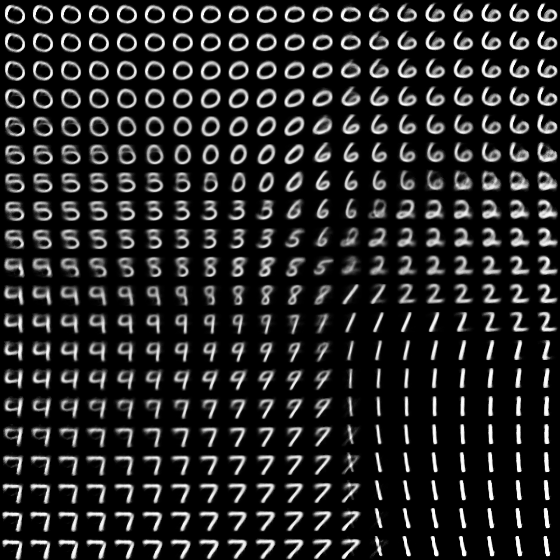

In [26]:
Image('gaussian_manifold.png')

##Let's look at the main function that run the experiment.

#### experiment/aae_mnist.py

### Firstly, we import all the libraries we need.


```
import sys
import argparse
import numpy as np
import tensorflow as tf

sys.path.append('../')
from src.dataflow.mnist import MNISTData
from src.models.aae import AAE
from src.helper.trainer import Trainer
from src.helper.generator import Generator
from src.helper.visualizer import Visualizer
```
### Then, we set the path for our image data (hand-written digit images) and path to save our training results.


```
DATA_PATH = './mnist'
SAVE_PATH = './mnist/out/aae'
```



### Define function to get arguments for main function 
```
def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--train', action='store_true',
                        help='Train the model of Fig 1 and 3 in the paper.')
    parser.add_argument('--train_supervised', action='store_true',
                        help='Train the model of Fig 6 in the paper.')
    parser.add_argument('--train_semisupervised', action='store_true',
                        help='Train the model of Fig 8 in the paper.')
    parser.add_argument('--label', action='store_true',
                        help='Incorporate label info (Fig 3 in the paper).')
    parser.add_argument('--generate', action='store_true',
                        help='Sample images from trained model.')
    parser.add_argument('--viz', action='store_true',
                        help='Visualize learned model when ncode=2.')
    parser.add_argument('--supervise', action='store_true',
                        help='Sampling from supervised model (Fig 6 in the paper).')
    parser.add_argument('--load', type=int, default=99,
                        help='The epoch ID of pre-trained model to be restored.')
    
```

### An example of calling the main functions


```
aae_mnist.py --train --ncode 2 --dist_type gaussian
```



### Define functions to read data

```
def read_train_data(batch_size, n_use_label=None, n_use_sample=None)

def read_valid_data(batch_size)

```



###<mark> Define function to train AAE</mark>


```
def train():
```

#### 1. Call functions to load data
```
    # load data
    train_data = read_train_data(FLAGS.bsize, n_use_label=n_use_label, n_use_sample=n_use_sample)
    valid_data = read_valid_data(FLAGS.bsize)
``` 
    
#### 2. Create the AAE model to be trained by calling AAE modules defined in src/models/aae.py


```
 model = AAE(n_code=FLAGS.ncode, wd=0, n_class=10, 
                use_label=FLAGS.label, add_noise=FLAGS.noise,
                enc_weight=FLAGS.encw, gen_weight=FLAGS.genw,
                dis_weight=FLAGS.disw)
model.create_train_model()

```

#### 3. Create the AAE model for validation dataset. This model has the same weights as the trained model.


```
valid_model = AAE(n_code=FLAGS.ncode, n_class=10)
valid_model.create_generate_model(b_size=400)

```

#### 4. Define trainer for training AAE model. This trainer model defines the objective functions and updating rules. It is defined in src/helper/trainer.py.  

```
trainer = Trainer(model, valid_model, train_data,
                      distr_type=FLAGS.dist_type, use_label=FLAGS.label,
                      init_lr=FLAGS.lr, save_path=SAVE_PATH)
```

#### 5. Define generator to sample from 2D Gaussian distribution and visualize results. Generator is defined in src/helper/generator.py.

```
generator = Generator(generate_model=valid_model, save_path=SAVE_PATH,
                          distr_type=FLAGS.dist_type, n_labels=10,
                          use_label=FLAGS.label)

```

#### The rest of this function is to print out messages of training epochs to the screen. 



# Let's try to run the main function and check out the training results in experiment/mnist/out !

In [35]:
cd ../experiment/


/content/adversarial-autoencoders/experiment


In [0]:
!python aae_mnist.py --train --ncode 2 --dist_type gaussian

W0730 00:00:35.127158 139780107310976 deprecation_wrapper.py:119] From ../src/models/modules.py:58: The name tf.keras.initializers.he_normal is deprecated. Please use tf.compat.v1.keras.initializers.he_normal instead.

W0730 00:00:37.640194 139780107310976 deprecation_wrapper.py:119] From ../src/models/aae.py:59: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 00:00:37.645216 139780107310976 deprecation_wrapper.py:119] From ../src/models/aae.py:114: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0730 00:00:37.645519 139780107310976 deprecation_wrapper.py:119] From ../src/models/aae.py:114: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0730 00:00:37.648390 139780107310976 deprecation_wrapper.py:119] From ../src/models/layers.py:91: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0730 00:00:37.661160 139780107310976 deprecat

# Things to explore: try other training options listed in readme.md from https://github.com/conan7882/adversarial-autoencoders.